# BÀI KIỂM TRA CUỐI KÌ
* Môn: **Linear Algebra**
* Thời gian: **90 phút**
* Họ tên học viên: Nguyễn Xuân Hoàng
* Mã học viên: 3694709

**Yêu cầu**: Sử dụng tính toán trên Python để hoàn thành các bài tập sau đây.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
from sklearn.datasets import load_wine

### Bài 1 (2 điểm)
Cho ma trận đối xứng:
$$A=\left( 
\begin {array}{cccc} 
0&1/2&1/3&2/5\\ 
1/2&0&1/3&0\\ 
1/3&1/2&0&3/5\\ 
1/6&0&1/3&0 
\end {array}  
\right)$$

* Chỉ ra rằng ma trận $A$ có giá trị riêng bằng $1$ và tìm véc-tơ riêng tương ứng với giá trị riêng bằng $1$.
* Tìm ma trận không suy biến $P$ và ma trận đường chéo $D$ sao cho $A=PDP^{-1}$.
* Tính số điều kiện $k(A)=||A||_F.||A^{-1}||_F$ (chuẩn Frobenious).

In [3]:
A = np.array([0, 1/2, 1/3, 2/5, 1/2, 0, 1/3, 0, 1/3, 1/2, 0, 3/5, 1/6, 0, 1/3, 0]).reshape(4,4)
print(A)

[[0.         0.5        0.33333333 0.4       ]
 [0.5        0.         0.33333333 0.        ]
 [0.33333333 0.5        0.         0.6       ]
 [0.16666667 0.         0.33333333 0.        ]]


In [4]:
eig_values, eig_vectors = np.linalg.eig(A)
print('Giá trị riêng của ma trận A là:', eig_values)

Giá trị riêng của ma trận A là: [ 1.         -0.66666667 -0.37748518  0.04415184]


**Kết luận**: Dựa vào kết quả trên, A có một trị riêng bằng 1 

In [5]:
print("Vector riêng ứng với trị riêng bằng 1 là:", eig_vectors[:, 0])

Vector riêng ứng với trị riêng bằng 1 là: [-0.56076049 -0.48205726 -0.60503105 -0.2951371 ]


## 1.2

In [6]:
P = eig_vectors
D = np.diag(eig_values)

print("Ma trận P là: ", P, sep = '\n')
print("Ma trận D là: ", D, sep = '\n')

Ma trận P là: 
[[-0.56076049 -0.36970341 -0.64686286 -0.18107443]
 [-0.48205726  0.58096251  0.28560188 -0.68352912]
 [-0.60503105 -0.60736989  0.64686286  0.18107443]
 [-0.2951371   0.3961108  -0.28560188  0.68352912]]
Ma trận D là: 
[[ 1.          0.          0.          0.        ]
 [ 0.         -0.66666667  0.          0.        ]
 [ 0.          0.         -0.37748518  0.        ]
 [ 0.          0.          0.          0.04415184]]


In [7]:
#Kiểm tra 
np.round(P @ D @ np.linalg.inv(P) - A, 3)

array([[-0., -0., -0., -0.],
       [-0.,  0., -0., -0.],
       [-0.,  0., -0., -0.],
       [-0., -0.,  0., -0.]])

## 1.3 Tính số điều kiện k(A)


In [8]:
inv_A = np.linalg.inv(A)

k_A = np.sqrt(np.sum(A ** 2) * np.sum(inv_A ** 2))

print("Số điều kiện k(A)=", k_A)

Số điều kiện k(A)= 31.595780308980093


### Bài 2 (2 điểm)
Cho bảng số liệu về thể tích ($X_1$), trọng lượng $(X_2)$ và lượng khí thải $CO_2$ ($Y$) của $5$ loại xe khác nhau:
$$\begin {array}{|c|c|c|c|c|c|} 
\hline
X_1& 1,0 &1,2& 0,9& 1,5&1,4\\
\hline
X_2& 0,79& 1,16 & 0,929 & 0,865 & 0,11\\
\hline
Y& 99& 95& 90 &105 &92\\
\hline
\end {array}
 $$

* Tìm mô hình hồi quy tuyến tính $Y=\beta_0+\beta_1X_1+\beta_2X_2$ bằng phương pháp bình phương tối thiểu.
* Tính sai số $MSE$ của mô hình hồi quy tuyến tính trên.
* Tìm mô hình hồi quy $Y=f(X_1,X_2)$ để giảm sai số $MSE$ so với mô hình hồi quy tuyến tính.

### 2.1 Tìm mô hình hồ quy tuyến tính

In [9]:
X1 = np.array([1.0, 1.2, 0.9, 1.5, 1.4])
X2 = np.array([0.79, 1.16, 0.929, 0.865, 0.11])
X0 = np.ones(len(X1))    #bias

Y = np.array([99, 95, 90, 105, 92])
X = np.vstack([X0, X1, X2]).T

In [10]:
print(X, '\n')
print(Y)

[[1.    1.    0.79 ]
 [1.    1.2   1.16 ]
 [1.    0.9   0.929]
 [1.    1.5   0.865]
 [1.    1.4   0.11 ]] 

[ 99  95  90 105  92]


In [11]:
#Tìm tham số của mô hình
beta = np.linalg.lstsq(X, Y, rcond=None)[0]
print("Hệ số của mô hình hồi quy tuyến tính cần tìm là:", beta)

Hệ số của mô hình hồi quy tuyến tính cần tìm là: [70.49349096 16.49854701  7.66509163]


### 2.2: Sai số MSE của mô hình trên

In [12]:
#Giá trị dự đoán
Y_hat = X @ beta
#Tính sai số MSE
MSE = np.sum((Y_hat - Y) ** 2) / len(Y)

print("Sai số MSE của mô hình là: ", MSE)


Sai số MSE của mô hình là:  14.942623750153256


### 2.3 Tìm mô hình hồi quy  Y=f(X1,X2)  để giảm sai số  MSE  so với mô hình hồi quy tuyến tính

Chọn mô hình hồi quy sau: $f(X_1, X_2) = \beta_0 + \beta_1X_1 + \beta_3X_2 +  \beta_2X_1^2 + \beta_4X_2^2$

Đặt: $X_2 = X_1^2, X_4 = X_3^2$ 

In [13]:
X1 = np.array([1.0, 1.2, 0.9, 1.5, 1.4])
X2 = X1 ** 2
X3 = np.array([0.79, 1.16, 0.929, 0.865, 0.11])
X4 = X3 ** 2
X0 = np.ones(len(X1))
##Ma tran X mới
X_moi = np.vstack([X0, X1, X2, X3, X4]).T
print(X_moi)

[[1.       1.       1.       0.79     0.6241  ]
 [1.       1.2      1.44     1.16     1.3456  ]
 [1.       0.9      0.81     0.929    0.863041]
 [1.       1.5      2.25     0.865    0.748225]
 [1.       1.4      1.96     0.11     0.0121  ]]


In [14]:
#Hệ số beta với mô hình mới
beta_moi = np.linalg.lstsq(X_moi, Y, rcond=None)[0]

Y_hat_moi = X_moi @ beta_moi
MSE_moi = np.sum((Y_hat_moi - Y) ** 2) / len(Y)

print("Sai số MSE với mô hình mới được chọn là: ", MSE_moi)

Sai số MSE với mô hình mới được chọn là:  9.370405376577266e-27


In [15]:
print('MSE của mô hình cũ gấp', round(MSE/MSE_moi,0), 'lần')

MSE của mô hình cũ gấp 1.5946613993354637e+27 lần


**KL**: Từ kết quả trên cho thấy mô hình mới có MSE giảm rất nhiều so với mô hình cũ

### Bài 3 (2 điểm)
Cho ma trận:

$$A=\left( \begin {array}{cccc} 4&4&2&4\\ 8&1&2&4\\ 4&-3&0&0\end {array} \right) $$

* Tìm khai triển kỳ dị SVD của ma trận $A=U\Sigma V^T$.

* Chỉ rõ các cặp véc-tơ kỳ dị $(\sigma,u,v)$ với $\sigma>0$ và $Av=\sigma u, A^Tu=\sigma v$.

* Viết khai triển kỳ dị SVD (dạng rút gọn) của ma trận $A=U_r\Sigma_r V_r^T$ với $r=rank(A)$, từ đó tính ma trận nghịch đảo suy rộng $A^{\dagger}$.

In [16]:
A = np.array([4, 4, 2, 4, 8, 1, 2, 4, 4, -3, 0, 0]).reshape(3,4)
print(A)

[[ 4  4  2  4]
 [ 8  1  2  4]
 [ 4 -3  0  0]]


### 3.1: Tìm khải triển kỳ dị SVD của ma trận A=UΣVT 

In [17]:
U, s, Vt = np.linalg.svd(A)
S = np.zeros((3, 4))
S[0, 0] = s[0]
S[1, 1] = s[1]
S[2, 2] = s[2]

print("U = \n", U)
print("\nS = \n", S)
print("\nV = \n", Vt.T)

U = 
 [[-0.56046438 -0.59375613  0.57735027]
 [-0.79444009  0.18849832 -0.57735027]
 [-0.23397571  0.78225446  0.57735027]]

S = 
 [[1.15346458e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.38070119e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.06353429e-16 0.00000000e+00]]

V = 
 [[-8.26491004e-01  4.20387564e-01 -3.74415432e-01 -8.63031977e-17]
 [-2.02379034e-01 -8.42509076e-01 -4.99220576e-01 -8.43813746e-17]
 [-2.34927796e-01 -1.50633829e-01  3.49454403e-01 -8.94427191e-01]
 [-4.69855592e-01 -3.01267659e-01  6.98908807e-01  4.47213595e-01]]


In [18]:
#test
print(np.round(U @ S @ Vt - A, 3))

[[ 0. -0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0. -0. -0. -0.]]


### 3.2: Chỉ rõ các cặp véc-tơ kỳ dị $(\sigma,u,v)$ với $\sigma>0$ và $Av=\sigma u, A^Tu=\sigma v$.

In [19]:
for i in range(1, len(s) + 1):
  print(f"σ{i}=", s[i - 1])
  print(f"u{i}=", U[:, i - 1])
  print(f"v{i}=", Vt[ i - 1, :])
  print("\n--------------------------------------------------------------")

σ1= 11.534645842794328
u1= [-0.56046438 -0.79444009 -0.23397571]
v1= [-0.826491   -0.20237903 -0.2349278  -0.46985559]

--------------------------------------------------------------
σ2= 5.380701188628446
u2= [-0.59375613  0.18849832  0.78225446]
v2= [ 0.42038756 -0.84250908 -0.15063383 -0.30126766]

--------------------------------------------------------------
σ3= 3.0635342936855694e-16
u3= [ 0.57735027 -0.57735027  0.57735027]
v3= [-0.37441543 -0.49922058  0.3494544   0.69890881]

--------------------------------------------------------------


### 3.3 Viết khai triển kỳ dị SVD (dạng rút gọn) của ma trận $A=U_r\Sigma_r V_r^T$ với $r=rank(A)$, từ đó tính ma trận nghịch đảo suy rộng $A^{\dagger}$.

In [20]:
Ur = U[:, :3]
Vr = Vt.T[:, :3]
Sr = S[:, :3]

print("Ur = \n", Ur, '\n')
print("Sr = \n", Sr, '\n')
print("Vr = \n", Vr)



Ur = 
 [[-0.56046438 -0.59375613  0.57735027]
 [-0.79444009  0.18849832 -0.57735027]
 [-0.23397571  0.78225446  0.57735027]] 

Sr = 
 [[1.15346458e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.38070119e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.06353429e-16]] 

Vr = 
 [[-0.826491    0.42038756 -0.37441543]
 [-0.20237903 -0.84250908 -0.49922058]
 [-0.2349278  -0.15063383  0.3494544 ]
 [-0.46985559 -0.30126766  0.69890881]]


In [21]:
#Test
print(np.round(Ur@Sr@Vr.T - A, 3))

[[ 0. -0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0. -0. -0. -0.]]


Ta có: $A^\dagger = (U_r\sum_r V_r^T)^\dagger  = \frac{1}{\sigma_1}v_1u_1^T + \dots +\frac{1}{\sigma_r}v_ru_r^T$

In [22]:
#Tính ma trận nghịch đảo suy rộng
A_dagger = np.zeros((4, 3))

for n in range(3):
  A_dagger += 1/Sr[n, n] * Vr[:, n].reshape(-1, 1) @ (Ur[:, n].reshape(-1, 1)).T

print("A_dagger = \n", A_dagger)

A_dagger = 
 [[-7.05619164e+14  7.05619164e+14 -7.05619164e+14]
 [-9.40825551e+14  9.40825551e+14 -9.40825551e+14]
 [ 6.58577886e+14 -6.58577886e+14  6.58577886e+14]
 [ 1.31715577e+15 -1.31715577e+15  1.31715577e+15]]


### Bài 4 (2 điểm)
Trong thư viện sklearn ta load dữ liệu wine (<b>from sklearn.datasets import load_wine <b>) và gọi (<b> x,y <b>) là ma trận $x$ và cột phân loại $y$ bằng cách đặt <b>x,y=load_wine(return_X_y=True) <b>. Ma trận $x$ gồm có $178$ quan sát trong không gian $R^{13}$.

* Tính giá trị trung bình $\bar{x}$ của các điểm trên.
* Tính ma trận hiệp phương sai $S$ của dữ liệu trên.
* Thực hiện phương pháp phân tích thành phần chính đối với dữ liệu trên.
* Biểu diễn dữ liệu trên không gian tạo bởi hai thành phần chính đầu tiên với các điểm được vẽ bằng màu theo thuộc tính $y$.

In [23]:
x, y = load_wine(return_X_y=True)
print(x.shape) 
print(y.shape)

(178, 13)
(178,)


### 4.1: Tính giá trị trung bình $\bar{x}$ của các điểm trên.

In [24]:
bar_x = np.mean(x, axis=0)
print("Giá trị trung bình của x là: \n", bar_x)

Giá trị trung bình của x là: 
 [1.30006180e+01 2.33634831e+00 2.36651685e+00 1.94949438e+01
 9.97415730e+01 2.29511236e+00 2.02926966e+00 3.61853933e-01
 1.59089888e+00 5.05808988e+00 9.57449438e-01 2.61168539e+00
 7.46893258e+02]


### 4.2: Tính ma trận hiệp phương sai $S$ của dữ liệu trên.

In [25]:
x1 = x - bar_x

matrix_S = 1/x1.shape[0] * x1.T @ x1

print("Ma trận hiệp phương sai S cần tìm là: \n", matrix_S)

Ma trận hiệp phương sai S cần tìm là: 
 [[ 6.55359730e-01  8.51303465e-02  4.68504671e-02 -8.36367662e-01
   3.12223835e+00  1.46062009e-01  1.90954384e-01 -1.56657524e-02
   6.31606805e-02  1.02250568e+00 -1.32386485e-02  4.14635652e-02
   1.63642650e+02]
 [ 8.51303465e-02  1.24100408e+00  4.99945840e-02  1.07028491e+00
  -8.65887514e-01 -2.33021219e-01 -4.56053791e-01  4.05045228e-02
  -1.40354021e-01  6.41215496e-01 -1.42520437e-01 -2.90804520e-01
  -6.71693786e+01]
 [ 4.68504671e-02  4.99945840e-02  7.48418003e-02  4.03926209e-01
   1.11662795e+00  2.20211779e-02  3.13575685e-02  6.32274965e-03
   1.50706350e-03  1.63729302e-01 -4.65585027e-03  7.57555864e-04
   1.92112012e+01]
 [-8.36367662e-01  1.07028491e+00  4.03926209e-01  1.10900306e+01
  -3.95243025e+00 -6.67378645e-01 -1.16549807e+00  1.49576790e-01
  -3.75057253e-01  1.44209443e-01 -2.07943233e-01 -6.52547658e-01
  -4.60752225e+02]
 [ 3.12223835e+00 -8.65887514e-01  1.11662795e+00 -3.95243025e+00
   2.02843328e+02  1.90570

### 4.3: Thực hiện phương pháp phân tích thành phần chính đối với dữ liệu trên.

In [26]:
eig_values, eig_vectors = np.linalg.eigh(matrix_S)
print("Giá trị riêng: \n", eig_values)
print('-----------------------------------------------------')
print("Thành phần chính tính theo cột là: \n", eig_vectors)

Giá trị riêng: 
 [8.15761492e-03 2.09539821e-02 3.73648779e-02 7.12997795e-02
 1.11467008e-01 1.50530810e-01 2.77406256e-01 8.36338792e-01
 1.22194160e+00 4.96313828e+00 9.38509059e+00 1.71565967e+02
 9.86444761e+04]
-----------------------------------------------------
Thành phần chính tính theo cột là: 
 [[-8.02924535e-03 -1.56514071e-02 -1.49715080e-02 -2.24499994e-03
   8.66006124e-02 -2.84820658e-01 -9.23280337e-01  1.94120104e-01
  -2.03369773e-02  1.41446778e-01 -1.68738094e-02 -1.20340617e-03
   1.65926472e-03]
 [ 1.10903923e-02  6.72955455e-02 -2.31876506e-02 -1.85093501e-02
   1.56621385e-02  6.46744678e-02  1.50109941e-01  7.42472963e-01
   6.12883454e-01  1.60389543e-01 -1.22003373e-01 -2.15498184e-03
  -6.81015556e-04]
 [ 1.73685673e-01 -1.32063034e-01  9.54010643e-01 -8.67996529e-02
   7.36498524e-02  1.49339532e-01 -4.50095494e-02  4.17529118e-02
  -2.01755752e-02 -9.77280992e-03 -5.19874304e-02 -4.59369254e-03
   1.94905742e-04]
 [-1.93956297e-03  5.39380582e-03 -5.2821

### 4.4: Biểu diễn dữ liệu trên không gian tạo bởi hai thành phần chính đầu tiên với các điểm được vẽ bằng màu theo thuộc tính $y$.

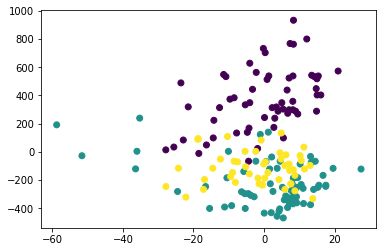

In [27]:
import matplotlib.pyplot as plt
#Lay hai thanh phan chinh dau tien 
two_first = np.argsort(eig_values)[-2:]

U = eig_vectors[:, two_first]
Z = x1 @ U

plt.scatter(Z[:, 0], Z[:, 1], c=y)
plt.show()

### Bài 5 (2 điểm)

Cho file dữ liệu **matrix1.csv**, đọc dữ liệu và lưu vào ma trận  𝑋  cỡ  $10\times 12$  gồm các giá trị trong file dữ liệu.

Tìm hai ma trận không âm  𝑊  cỡ  $10\times 4$  và  𝐻  cỡ  $4\times 12$  để  $$X\approx WH. $$

 * Đặt $H$ là ma trận có các phần tử bằng $1$, tìm ma trận không âm $W$ để $||X-WH||^2_F+||W||_F^2$ đạt giá trị nhỏ nhất.
 * Với $W$ tìm được ở trên, tìm ma trận không âm của $H$ để $||X-WH||^2_F+||H||_F^2$ đạt giá trị nhỏ nhất.
 * Lặp lại quá trình trên với $n=10$ bước lặp để tìm các ma trận không âm $W,H$ để $||X-WH||^2_F+||W||_F^2+||H||^2_F$ đạt giá trị nhỏ nhất.

In [28]:
import pandas as pd
data = pd.read_excel("/content/drive/MyDrive/Data daiso/matrix1.xlsx", header=None).values
print(data.shape)
print(data)



(10, 1)
[['163,167,166,174,152,155,145,170,157,174,165,158']
 ['70,70,75,74,69,68,74,75,68,68,64,75']
 ['78,80,85,86,85,87,70,76,87,85,87,80']
 ['67,82,70,83,74,77,56,62,90,92,78,55']
 ['48,49,42,48,54,55,53,51,55,46,55,43']
 ['69,70,77,71,37,36,39,39,55,60,68,72']
 ['22,20,15,14,15,13,30,24,13,15,13,20']
 ['25,27,37,35,25,25,27,28,24,30,24,30']
 ['20,15,14,15,23,27,22,30,27,19,19,17']
 ['26,21,26,28,20,20,20,20,20,40,15,40']]


In [29]:
X = np.zeros((10, 12))
for i in range(10):
  X[i] = np.array([float(j) for j in data[i][0].split(',')])

print(X)

[[163. 167. 166. 174. 152. 155. 145. 170. 157. 174. 165. 158.]
 [ 70.  70.  75.  74.  69.  68.  74.  75.  68.  68.  64.  75.]
 [ 78.  80.  85.  86.  85.  87.  70.  76.  87.  85.  87.  80.]
 [ 67.  82.  70.  83.  74.  77.  56.  62.  90.  92.  78.  55.]
 [ 48.  49.  42.  48.  54.  55.  53.  51.  55.  46.  55.  43.]
 [ 69.  70.  77.  71.  37.  36.  39.  39.  55.  60.  68.  72.]
 [ 22.  20.  15.  14.  15.  13.  30.  24.  13.  15.  13.  20.]
 [ 25.  27.  37.  35.  25.  25.  27.  28.  24.  30.  24.  30.]
 [ 20.  15.  14.  15.  23.  27.  22.  30.  27.  19.  19.  17.]
 [ 26.  21.  26.  28.  20.  20.  20.  20.  20.  40.  15.  40.]]


In [30]:
# Gọi H  là ma trận có tất cả các phần tử bằng  1 
# Ta cần tìm ma trận không âm  W  để  ||X−WH||2F+||W||2F  đạt giá trị nhỏ nhất.
H = np.ones((4, 12)) 

Có $f(W) = ||X-WH||^2_F+||W||_F^2$

$\Rightarrow \frac{df(W)}{dW} = 2(WH - X)H^T + 2W = 0$

$\Rightarrow W(HH^T + I) = XH^T$

$\Rightarrow W = XH^T(HH^T+I)^\dagger$

$\Rightarrow W = [XH^T(HH^T+I)^\dagger]_+$


In [31]:
I = np.eye(4)
W = X @ H.T @ np.linalg.pinv(H@H.T + I)

print("W = \n", W) 

W = 
 [[39.71428571 39.71428571 39.71428571 39.71428571]
 [17.34693878 17.34693878 17.34693878 17.34693878]
 [20.12244898 20.12244898 20.12244898 20.12244898]
 [18.08163265 18.08163265 18.08163265 18.08163265]
 [12.2244898  12.2244898  12.2244898  12.2244898 ]
 [14.14285714 14.14285714 14.14285714 14.14285714]
 [ 4.36734694  4.36734694  4.36734694  4.36734694]
 [ 6.87755102  6.87755102  6.87755102  6.87755102]
 [ 5.06122449  5.06122449  5.06122449  5.06122449]
 [ 6.04081633  6.04081633  6.04081633  6.04081633]]


$f(H) = ||X-WH||^2_F+||W||_F^2$

$\Rightarrow \frac{df(H)}{dH} = 2W^T + 2W = 0$

$\Rightarrow W(HH^T + I) = XH^T$

$\Rightarrow W = XH^T(HH^T+I)^\dagger$

$\Rightarrow W = [XH^T(HH^T+I)^\dagger]_+$

In [32]:
# Với  W  tìm được ở trên, tìm ma trận không âm của  H  để  ||X−WH||2F+||H||2F  đạt giá trị nhỏ nhất.

$f(H) = ||X-WH||^2_F+||H||_F^2$

$\Rightarrow \frac{df(H)}{dH} = 2W^T(WH - X) + 2H = 0$

$\Rightarrow (W^TW + I)H = W^TX$

$\Rightarrow H = (W^TW+I)^\dagger W^TX$

$\Rightarrow H = [(W^TW+I)^\dagger W^TX]_+$

In [33]:
I = np.eye(4)
H = np.linalg.pinv(W.T @ W + I) @ W.T @ X
H[H < 0] = 0

print("H = \n", H) 

H = 
 [[1.01658861 1.05271042 1.0540189  1.09798165 0.96658903 0.98325556
  0.90763005 1.00770023 1.02991125 1.09160449 1.04160987 0.99940827]
 [1.01658861 1.05271042 1.0540189  1.09798165 0.96658903 0.98325556
  0.90763005 1.00770023 1.02991125 1.09160449 1.04160987 0.99940827]
 [1.01658861 1.05271042 1.0540189  1.09798165 0.96658903 0.98325556
  0.90763005 1.00770023 1.02991125 1.09160449 1.04160987 0.99940827]
 [1.01658861 1.05271042 1.0540189  1.09798165 0.96658903 0.98325556
  0.90763005 1.00770023 1.02991125 1.09160449 1.04160987 0.99940827]]


In [34]:
#Lặp lại các buwocs trên với n vòng lặp. Chọn n = 10 để ||X−WH||2F+||W||2F+||H||2F đạt giá trị nhỏ nhất 
n = 10
for i in range(n):
  W = X @ H.T @ np.linalg.pinv(H@H.T + I)
  W[W < 0] = 0
  H = np.linalg.pinv(W.T @ W + I) @ W.T @ X
  H[H < 0] = 0

print("W =\n", W)
print("H =\n", H)

W =
 [[26.19521341 21.11716687 30.53911522 17.09750719]
 [11.81921989  7.15524776 12.95436215  9.42999129]
 [12.19929915 12.69061505 15.30720296  8.10245225]
 [ 9.53176575 16.14009913 13.56509425  4.6470901 ]
 [ 5.5066068   6.74104134 10.82851881  6.24551517]
 [13.7013701   6.80338757 12.34164774  0.        ]
 [ 3.05649823  0.          3.85265875  3.84396526]
 [ 5.70398211  3.13527459  4.42354835  3.13419972]
 [ 1.52417228  2.65475358  3.93659511  4.26497582]
 [ 7.05046386  3.58487152  0.61954801  3.48215747]]
H =
 [[2.64003411 2.03978251 3.64817669 2.89396877 0.06211188 0.
  0.86016237 0.76882287 0.31356974 2.91176691 1.01361995 4.60141908]
 [0.38882558 1.47363828 0.63914965 1.96179229 2.4184794  2.80618621
  0.         0.40987547 3.19750903 3.78336117 1.49551193 0.        ]
 [2.34647271 2.64523319 1.90621528 1.57818391 1.66061919 1.62402678
  2.24141337 2.21923401 2.16137523 0.         3.55059285 0.60640023]
 [0.7755099  0.02360538 0.         0.42593973 2.93206491 3.05629483
  3.5012